# About Dataset
Dataset consists of 7 news type labels. These labels are economy, politics, life, technology, magazine, health, sport. This dataset was created by me via Mynet, Milliyet, etc websites. There are 600 headlines for each label in the dataset . Hence, total headlines count is 4200 for dataset.

# Loading Data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Turkish-HeadLines.csv")
df.head()

,HABERLER,ETIKET
0,TÜİK verilerine göre sanayi ciro endeksi Ağust...,Ekonomi
1,Piyasa güne eksi rezervde başladı,Ekonomi
2,"Citigroup, Deutsche Bank ve HSBC Libor manipül...",Ekonomi
3,Gelişen piyasa yatırımcılarını en fazla 'Fed' ...,Ekonomi
4,Bitcoin fiyatında yükseliş hız kesmiyor,Ekonomi


In [2]:
data = df.values

As you can see we have label in our data but we assume that we had no label and do the clustering with label name occurrences number on k-means

# Splitting Data

In [3]:
x = data[:,0]
x

array(['TÜİK verilerine göre sanayi ciro endeksi Ağustos ayında bir önceki yılın aynı ayına göre %26,6 arttı.',
       'Piyasa güne eksi rezervde başladı',
       'Citigroup, Deutsche Bank ve HSBC Libor manipülasyonu davasında 132 milyon dolar ödemeyi kabul ettiler.',
       ...,
       'Konak ilçesindeki operasyonda 55 gram esrar, 55 uyuşturucu hap ile 1 ruhsatsız tabanca ele geçirildi, 1 kişi tutuklandı',
       "Siirt ve Manisa'da düzenlenen operasyonda gözaltına alınan eski 2 kaymakam ve savcı tutuklandı",
       "Denizli'de Kaçak Sigara Operasyonu: 13 Gözaltı"], dtype=object)

In [4]:
target_data = data[:,-1]
target_data

array(['Ekonomi', 'Ekonomi', 'Ekonomi', ..., 'Yaşam', 'Yaşam', 'Yaşam'],
      dtype=object)

# Changing target data string to integer value

In [5]:
target_set = {s for s in target_data}
target_set

{'Ekonomi', 'Magazin', 'Sağlık', 'Siyaset', 'Spor', 'Teknoloji', 'Yaşam'}

In [6]:
target_id = {}
i=0
for s in target_set:
    target_id[s] = i
    i+=1
target_id

{'Teknoloji': 0,
 'Magazin': 1,
 'Ekonomi': 2,
 'Siyaset': 3,
 'Yaşam': 4,
 'Spor': 5,
 'Sağlık': 6}

In [7]:
y = [target_id[s] for s in target_data]

with no labels we don't need test data so pass the train test splitting proccess

In [8]:
# %25 test %75 train
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=37, stratify=y)


# Preprocessing 
Convert a collection of raw documents to a matrix of TF-IDF features.

Equivalent to CountVectorizer followed by TfidfTransformer which we used on classification on same data set.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vec = vectorizer.fit(x)   # train vec using x_train
vectorized = vec.transform(x)   # transform x_train using vec

vectorized variable is measured number of how frequently a term 't' occurs in a document 'd', giving a highers weight to more frequent terms.

# Clustering with KMeans


In [10]:
true_k = np.unique(y).shape[0]
true_k
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=true_k,
    init="k-means++", #  ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    max_iter=50
)
km.fit(vectorized)

KMeans(max_iter=50, n_clusters=7)

# Evaluation of the performance on the train set

In [11]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y, km.labels_))
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(vectorized, km.labels_, sample_size=1000)
)

Homogeneity: 0.274
Completeness: 0.373
V-measure: 0.316
Adjusted Rand-Index: 0.104
Silhouette Coefficient: 0.005


In [12]:
count_y= np.bincount(y)
c_kmlabels_ = np.bincount( km.labels_)
count_y

array([600, 600, 600, 600, 600, 600, 600], dtype=int64)

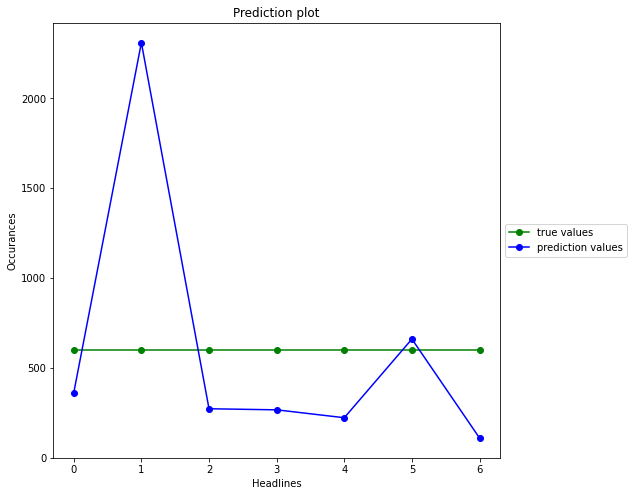

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize = (8, 8))
x = np.array(range(7))
y = np.array([
    count_y,
    c_kmlabels_

])
plt.title("Prediction plot")
plt.xlabel("Headlines")
plt.ylabel("Occurances")

for i, array in enumerate(y):
    plt.plot(x, array, color = 'g' if i==0 else 'b', marker = "o", label = "true values" if i==0 else "prediction values")
    
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()